<a href="https://colab.research.google.com/github/jmacedo91/Statistics-With-Python/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Alucar - Analisando as vendas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
alucar = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science: Introdução a análise de Séries Temporais/material curso - Time Series/alucar.csv')

In [ ]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [ ]:
print('Quantidade de linhas e colunas:', alucar.shape)

Quantidade de linhas e colunas: (24, 2)


In [ ]:
print('Quantidade de dados nulos:', alucar.isna().sum())

Quantidade de dados nulos: mes       0
vendas    0
dtype: int64


In [ ]:
print('Quantidade de dados nulos:', alucar.isna().sum().sum())

Quantidade de dados nulos: 0


In [ ]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
alucar['mes'] = pd.to_datetime(alucar['mes']) # Mudança na tipagem, importante!
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [ ]:
print(sns.__version__)

0.11.2


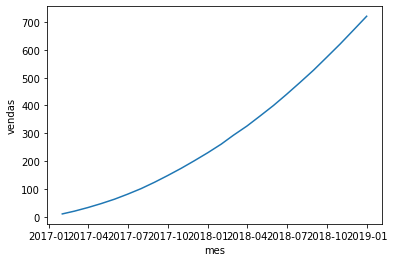

In [ ]:
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)

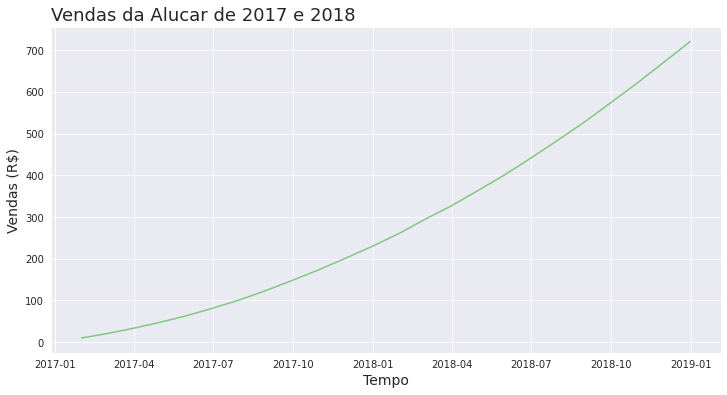

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Vendas da Alucar de 2017 e 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Vendas (R$)', fontsize = 14)
ax = ax

http://urbaninstitute.github.io/graphics-styleguide/

**Time series do nosso dia a dia**

Aprendemos que time series é uma coleção de observações ou dados, geralmente feita através de um tempo sequencial, que pode ser segundos, minutos, dias, meses, anos, entre outros.

Tipicamente, esse tempo é espaçados entre cada ponto de dados, que podemos medir o crescimento das vendas, como visto nesta primeira aula.

Há um post no blog da Alura que podemos aprender sobre Crescimento proporcional entre time series utilizando pandas.

https://blog.alura.com.br/crescimento-proporcional-entre-linhas-time-series-utilizando-pandas/

**Vale a pena conferir!**

<font size= 12>**Nessa aula:**</font>

- Carregamos um arquivo csv com as vendas da Alucar de 2017 e 2018

- Examinamos o arquivo através de funções do pandas, para descobrir a quantidade de linhas e colunas presentes com o comando alucar.shape

- Verificamos se havia dados nulos com o comando alucar.isna().sum()

- Alteramos o tipo do mês de object para datetime com o comando alucar['mes'] = pd.to_datetime(alucar['mes'])

- Importamos as bibliotecas necessárias para gerar um gráfico da vendas, porém ao plotar, o gráfico e as labels não estavam num tamanho adequado e sem um título

- Aperfeiçoamos o gráfico incluindo uma nova palette de cor, incluindo título e labels com tamanho adequado descrevendo melhor do que se trata nosso gráfico

## Decomposição

In [ ]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


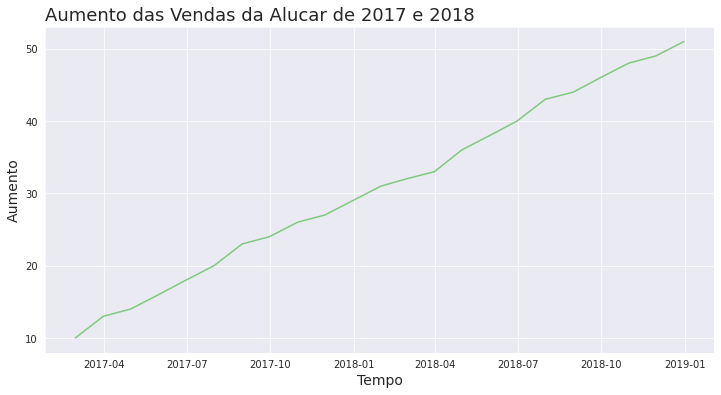

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'mes', y = 'aumento', data = alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Aumento das Vendas da Alucar de 2017 e 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Aumento', fontsize = 14)
ax = ax

In [ ]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x = x, y = y, data = dataset)
  ax.figure.set_size_inches(12, 6)
  ax.set_title(titulo, loc = 'left', fontsize = 18)
  ax.set_xlabel(labelx, fontsize = 14)
  ax.set_ylabel(labely, fontsize = 14)
  ax = ax

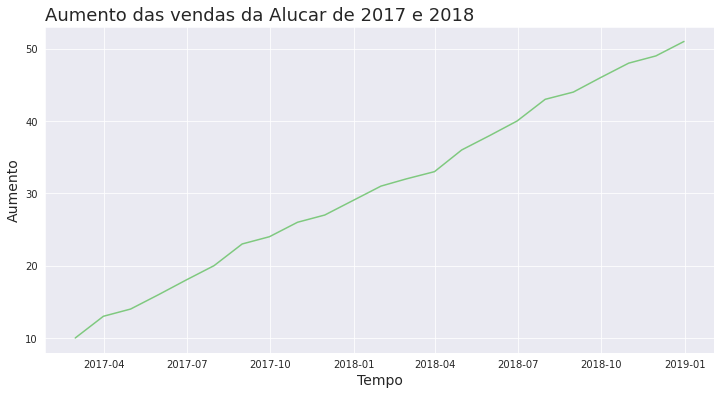

In [ ]:
plotar('Aumento das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [ ]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


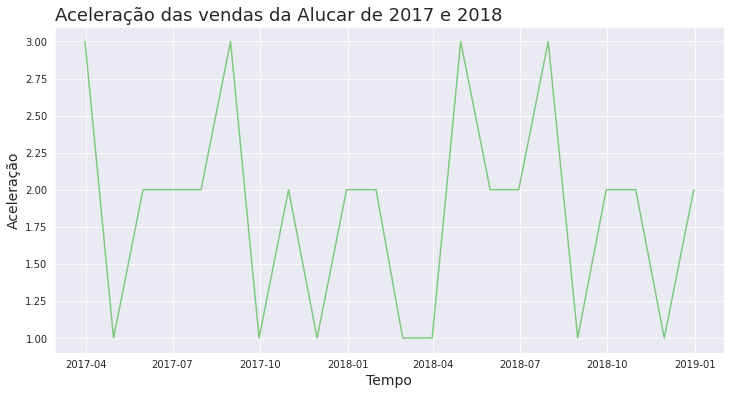

In [ ]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

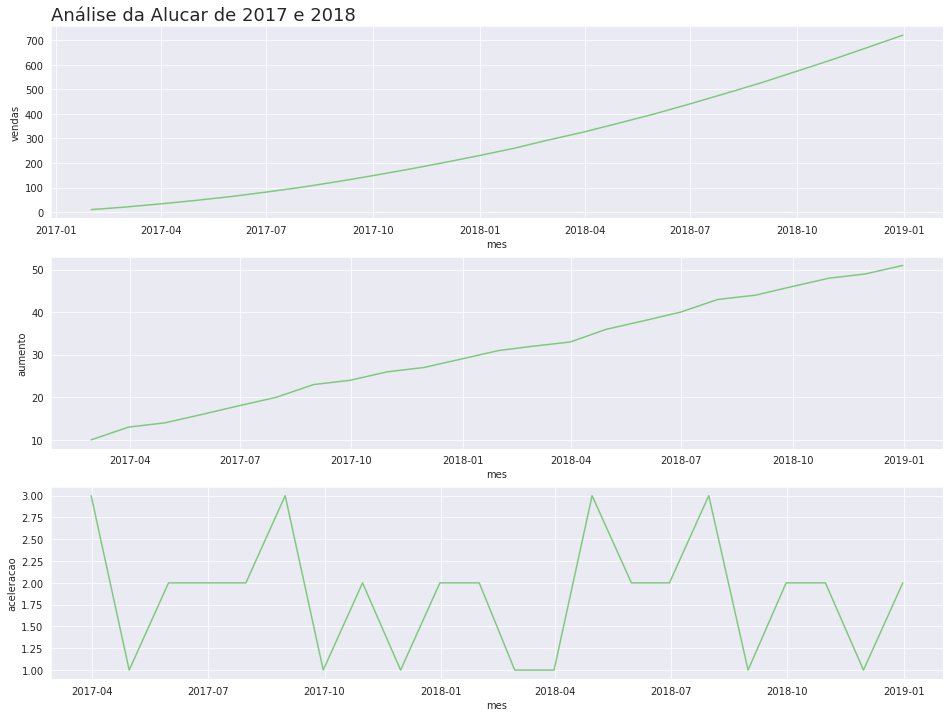

In [ ]:
plt.figure(figsize = (16, 12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise da Alucar de 2017 e 2018', fontsize = 18, loc = 'left')
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
plt.subplot(3, 1, 2)
sns.lineplot(x = 'mes', y = 'aumento', data = alucar)
plt.subplot(3, 1, 3)
sns.lineplot(x = 'mes', y = 'aceleracao', data = alucar)
ax = ax


In [ ]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize = (16, 12))
  ax = plt.subplot(3, 1, 1)
  ax.set_title(titulo, fontsize = 18, loc = 'left')
  sns.lineplot(x = x, y = y1, data = dataset)
  plt.subplot(3, 1, 2)
  sns.lineplot(x = x, y = y2, data = dataset)
  plt.subplot(3, 1, 3)
  sns.lineplot(x = x, y = y3, data = dataset)
  ax = ax

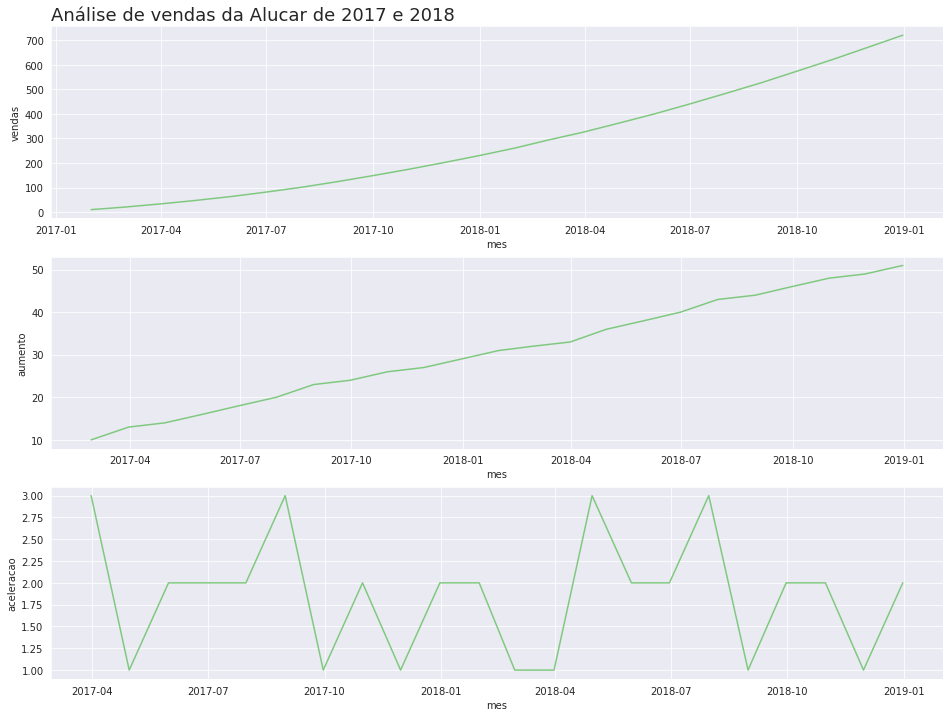

In [ ]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise de vendas da Alucar de 2017 e 2018')

## Autocorrelação

In [ ]:
from pandas.plotting import autocorrelation_plot

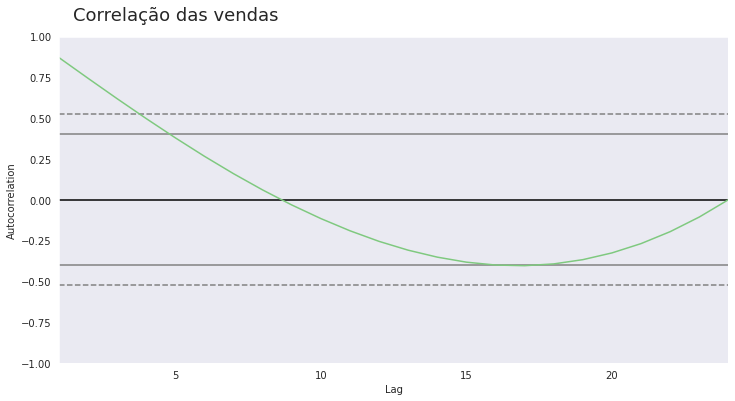

In [ ]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação das vendas', fontsize = 18, x = .26, y = .95)
autocorrelation_plot(alucar.vendas)
ax1 = ax

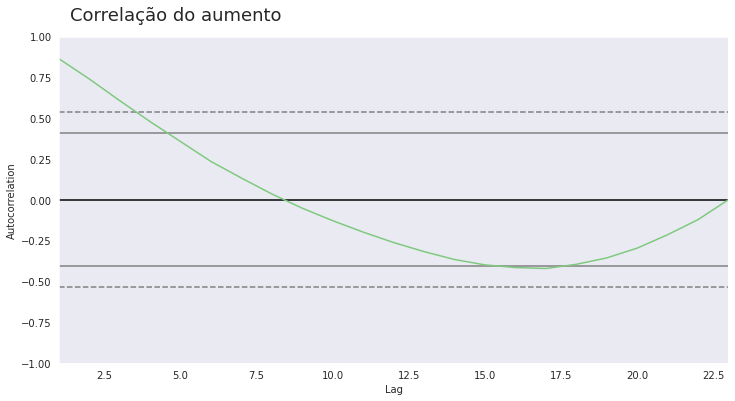

In [ ]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação do aumento', fontsize = 18, x = .26, y = .95)
autocorrelation_plot(alucar.aumento[1:])
ax = ax

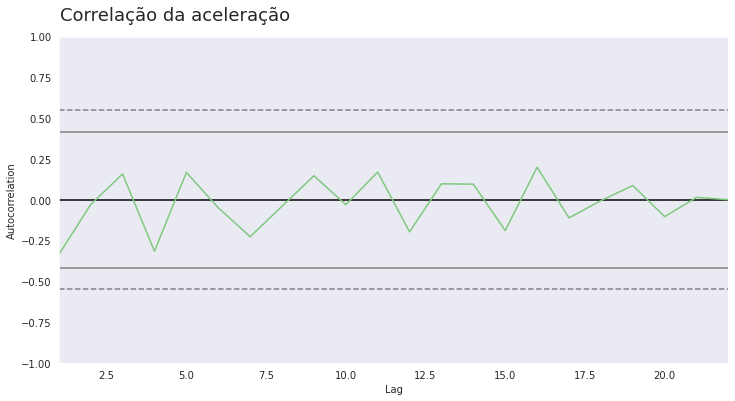

In [ ]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação da aceleração', fontsize = 18, x = .26, y = .95)
autocorrelation_plot(alucar.aceleracao[2:])
ax = ax

**Autocorelação**

A função de autocorrelação é a principal ferramenta de diagnóstico para análise de time series.

Autocorrelação significa a correlação de valores de uma mesma variável ordenados no tempo.

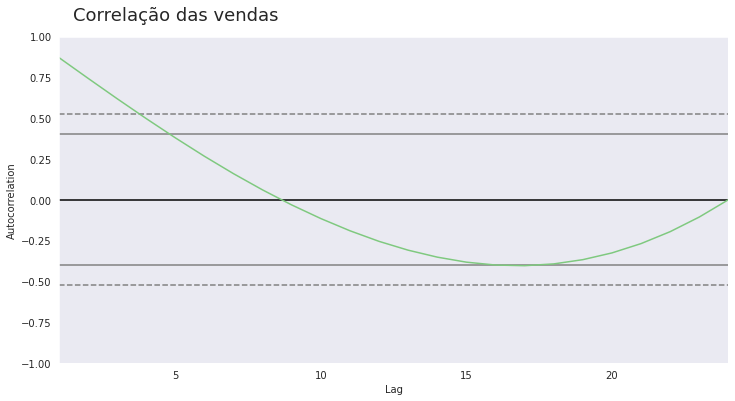

In [ ]:
ax1

Para melhor interpretação do gráfico, podemos analisar a tabela abaixo:

In [ ]:
correlacao = {'Autocorrelação': ['1', '0,7 a 0,9', '0,4 a 0,7', '0,2 a 0,4', '0', '<0', '-1'],
              'Interpretação': ['correlação perfeita positiva', 'correlação forte', 
                                'correlação moderada', 'correlação fraca', 'correlação nula', 
                                'correlação negativa', 'correlação perfeita negativa']}

In [ ]:
correlacao = pd.DataFrame(correlacao, index = [x + 1 for x in range(7)])
correlacao

,Autocorrelação,Interpretação
1,1,correlação perfeita positiva
2,"0,7 a 0,9",correlação forte
3,"0,4 a 0,7",correlação moderada
4,"0,2 a 0,4",correlação fraca
5,0,correlação nula
6,<0,correlação negativa
7,-1,correlação perfeita negativa


<font size= 12>**Nessa aula:**</font>

- Aplicamos a técnica de Decomposição de uma time series, para mensurar o crescimento mês a mês

- Utilizamos a função diff() para decomposição das vendas para criar o aumento, e do aumento para descobrir a aceleração

- Executamos a função de Autocorrelação para descobrir o nível de correlação das vendas, do aumento e da aceleração

- Criamos uma função chamada plotar() e plot_comparacao() para geração de gráficos padronizados, evitando código duplicado

# Analisando assinantes da newsletter

In [ ]:
assinantes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science: Introdução a análise de Séries Temporais/material curso - Time Series/newsletter_alucar.csv')

In [ ]:
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [ ]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [ ]:
print('Quantidade de linhas e colunas:', assinantes.shape)
print('Quantidade de dados nulos:', assinantes.isna().sum().sum())


Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [ ]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [ ]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head(10)

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0
5,2017-06-30,66,17.0,2.0
6,2017-07-31,85,19.0,2.0
7,2017-08-31,107,22.0,3.0
8,2017-09-30,132,25.0,3.0
9,2017-10-31,160,28.0,3.0


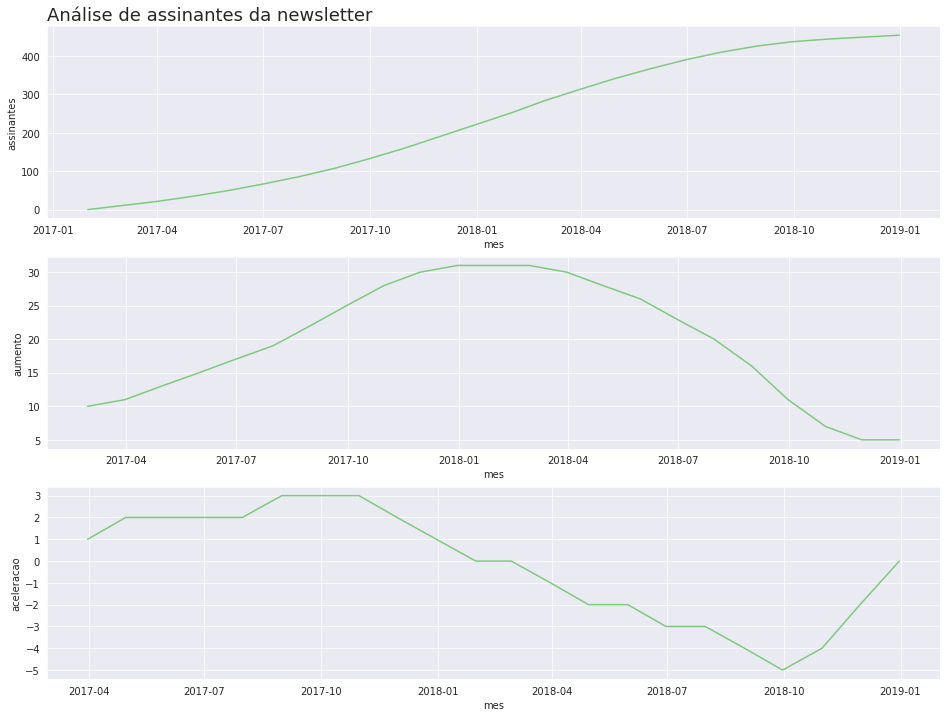

In [ ]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da newsletter')

#Chocolura - Analisando as vendas

In [ ]:
chocolura = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science: Introdução a análise de Séries Temporais/material curso - Time Series/chocolura.csv')

In [ ]:
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [ ]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.head()

,mes,vendas
0,2017-01-01,210
1,2017-02-01,185
2,2017-03-01,209
3,2017-04-01,280
4,2017-05-01,211


In [ ]:
print('Quantidade de linhas:', chocolura.shape[0])
print('Quantidade de dados nulos:', chocolura.isna().sum().sum())

Quantidade de linhas: 24
Quantidade de dados nulos: 0


In [ ]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


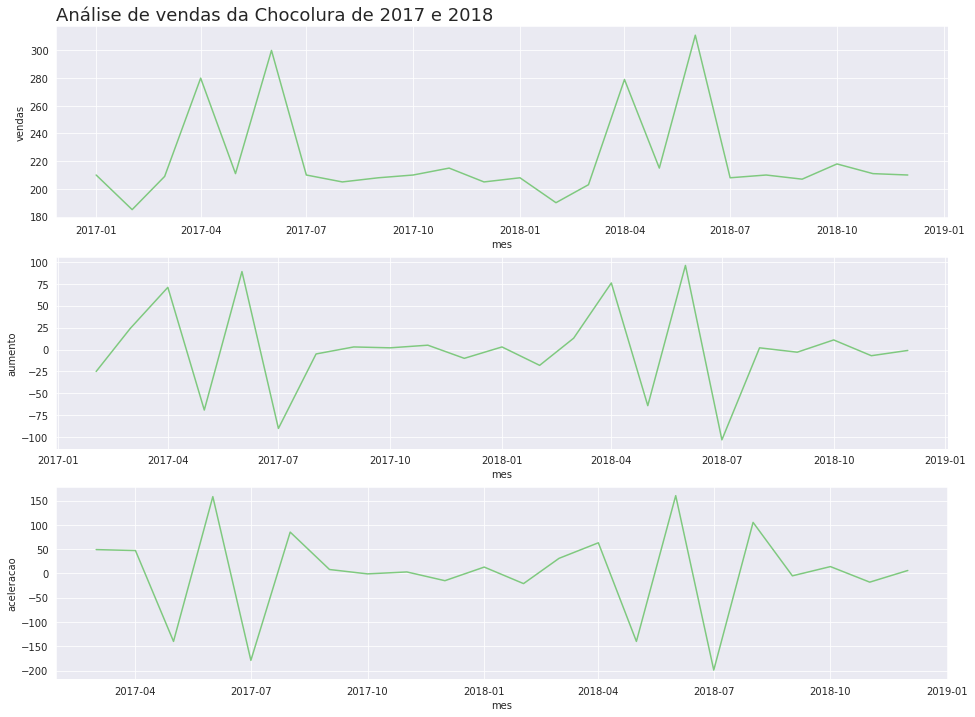

In [ ]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de vendas da Chocolura de 2017 e 2018')

Repare nos padrões de sazonalidade, vende-se mais chocolate na Páscoa.

# Chocolura - Vendas diárias (Outubro e Novembro)

In [ ]:
vendas_por_dia = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science: Introdução a análise de Séries Temporais/material curso - Time Series/vendas_por_dia.csv')

In [ ]:
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [ ]:
print('Quantidade de linhas e colunas: ', vendas_por_dia.shape)
print('Quantidade de dados nulos: ', vendas_por_dia.isna().sum().sum())

Quantidade de linhas e colunas:  (61, 2)
Quantidade de dados nulos:  0


In [ ]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [ ]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


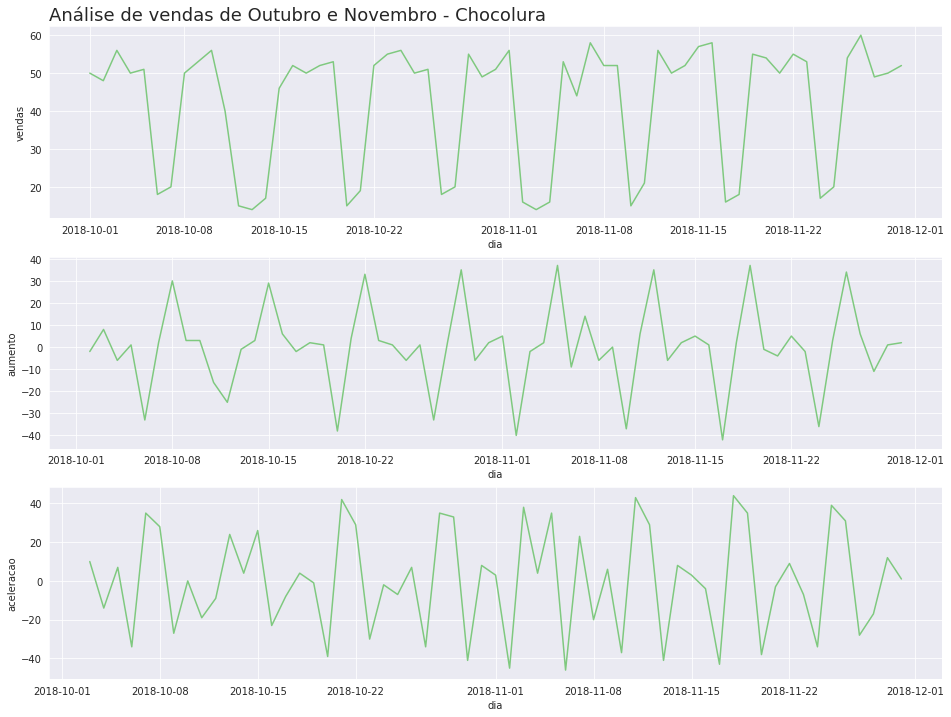

In [ ]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao',
                vendas_por_dia, 'Análise de vendas de Outubro e Novembro - Chocolura')

**Analisando a sazonalidade**

In [ ]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name() # Apresenta os dias da semana

In [ ]:
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [ ]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [ ]:
dias_traduzidos = {'Monday': 'Segunda', 'Tuesday': 'Terça', 'Wednesday': 'Quarta',
                   'Thursday': 'Quinta', 'Friday': 'Sexta', 'Saturday': 'Sábado',
       'Sunday': 'Domingo'}

In [ ]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


In [ ]:
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terça
9,2018-10-10,56,3.0,0.0,Quarta


**Agrupando os dias**

In [ ]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


<font size= 12>**Nessa aula:**</font>

- Vimos a importância da técnica de Decomposição na análise dos assinantes da newsletter da Alucar

- Analisamos as vendas da Chocolura e descobrimos um padrão repetitivo no movimento das vendas dentro de um período de tempo fixo, na qual é chamado de Sazonalidade

- Examinamos as vendas de uma determinada loja da Chocolura nos meses de Outubro e Novembro de 2018, e descobrimos que também havia uma sazonalidade

- Investigamos o que causava a sazonalidade desta loja

**Correlação das Vendas Diárias**

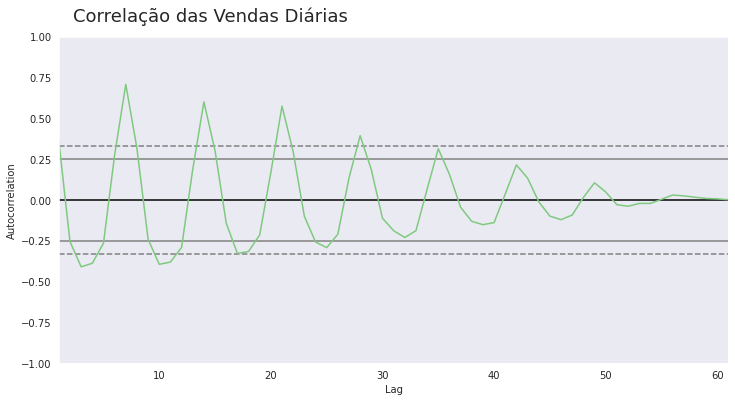

In [ ]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação das Vendas Diárias', fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

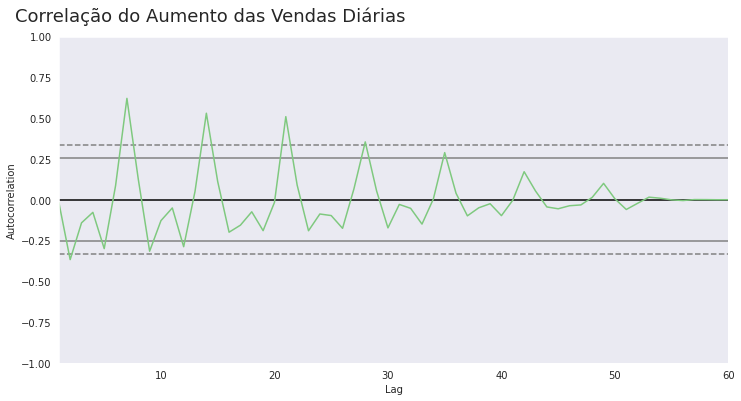

In [ ]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação do Aumento das Vendas Diárias', fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

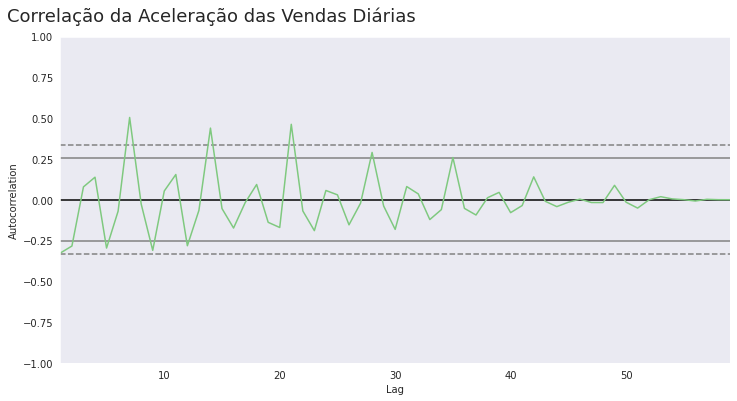

In [ ]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação da Aceleração das Vendas Diárias', fontsize = 18, x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

# Cafelura - Análise de Vendas

In [ ]:
cafelura = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science: Introdução a análise de Séries Temporais/material curso - Time Series/cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [ ]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
print('Quantidade de linhas e colunas:', cafelura.shape)
print('Quantidade de dados nulos:', cafelura.isna().sum().sum())


Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


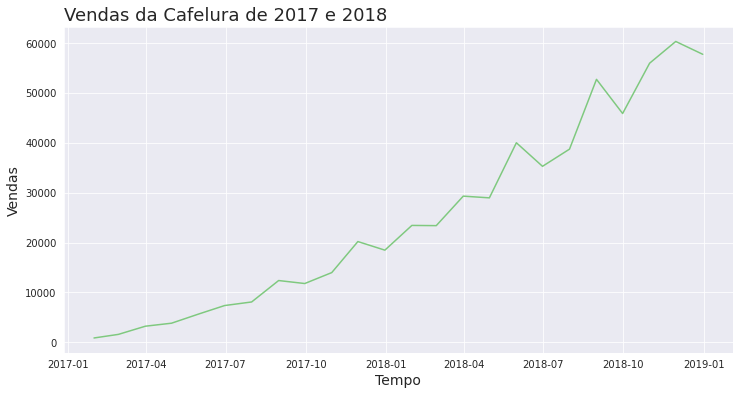

In [ ]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas',
       'mes', 'vendas', cafelura)

In [ ]:
quantidade_de_dias_de_fds = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science: Introdução a análise de Séries Temporais/material curso - Time Series/dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [ ]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [ ]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


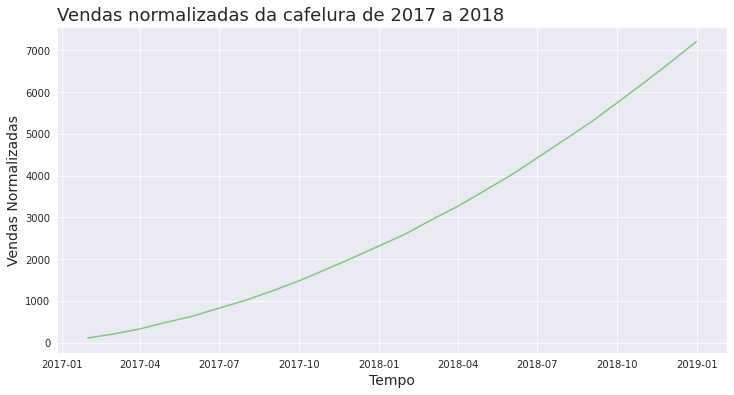

In [ ]:
plotar('Vendas normalizadas da cafelura de 2017 a 2018', 
       'Tempo', 'Vendas Normalizadas', 'mes', 'vendas_normalizadas', cafelura)

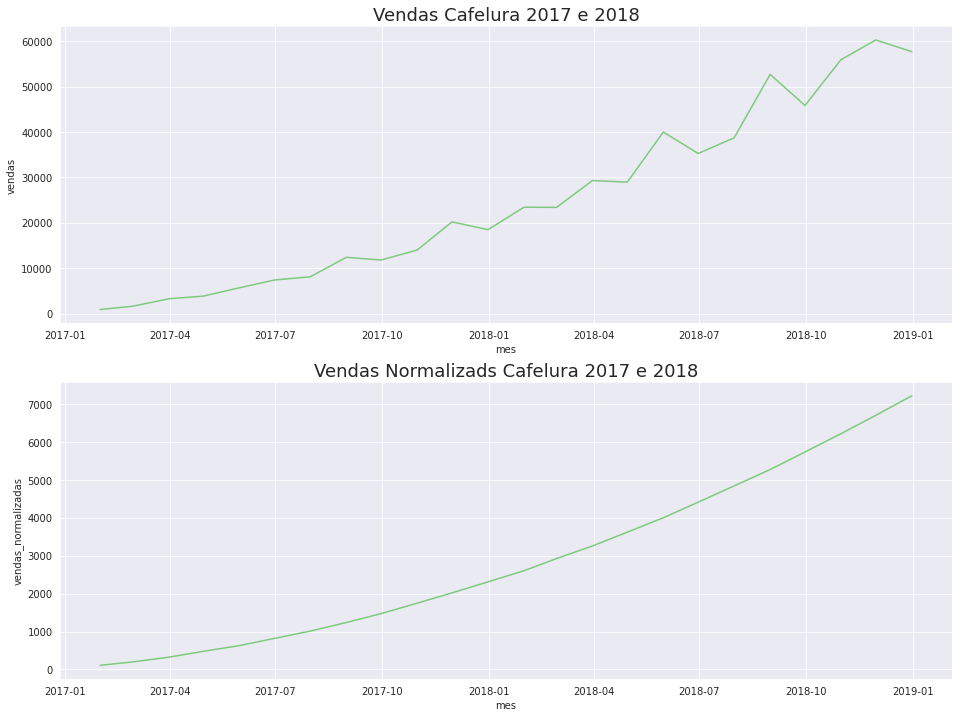

In [ ]:
plt.figure(figsize = (16, 12))
ax = plt.subplot(2, 1, 1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize = 18)
sns.lineplot(x = 'mes', y = 'vendas', data = cafelura)
ax = plt.subplot(2, 1, 2)
ax.set_title('Vendas Normalizads Cafelura 2017 e 2018', fontsize = 18)
sns.lineplot(x = 'mes', y = 'vendas_normalizadas', data = cafelura)

# Statsmodels

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


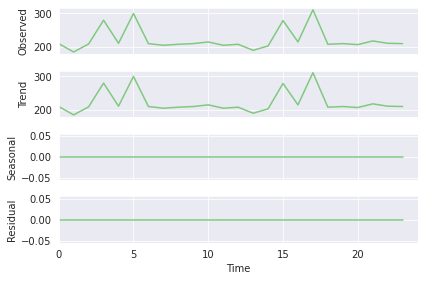

In [ ]:
resultado = seasonal_decompose([chocolura['vendas']], freq = 1)
ax = resultado.plot()

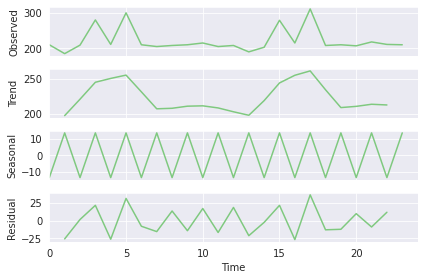

In [ ]:
resultado = seasonal_decompose([chocolura['vendas']], freq = 2)
ax = resultado.plot()

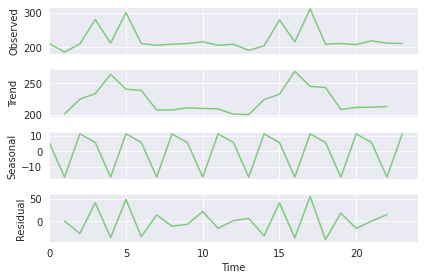

In [ ]:
resultado = seasonal_decompose([chocolura['vendas']], freq = 3)
ax = resultado.plot()

In [ ]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [ ]:
data = ({
    'observacao': observacao,
    'tendencia': tendencia,
    'sazonalidade': sazonalidade,
    'ruido': ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210,NaN,5.603175,NaN
1,185,201.333333,-16.730159,0.396825
2,209,224.666667,11.126984,-26.793651
3,280,233.333333,5.603175,41.063492
4,211,263.666667,-16.730159,-35.936508


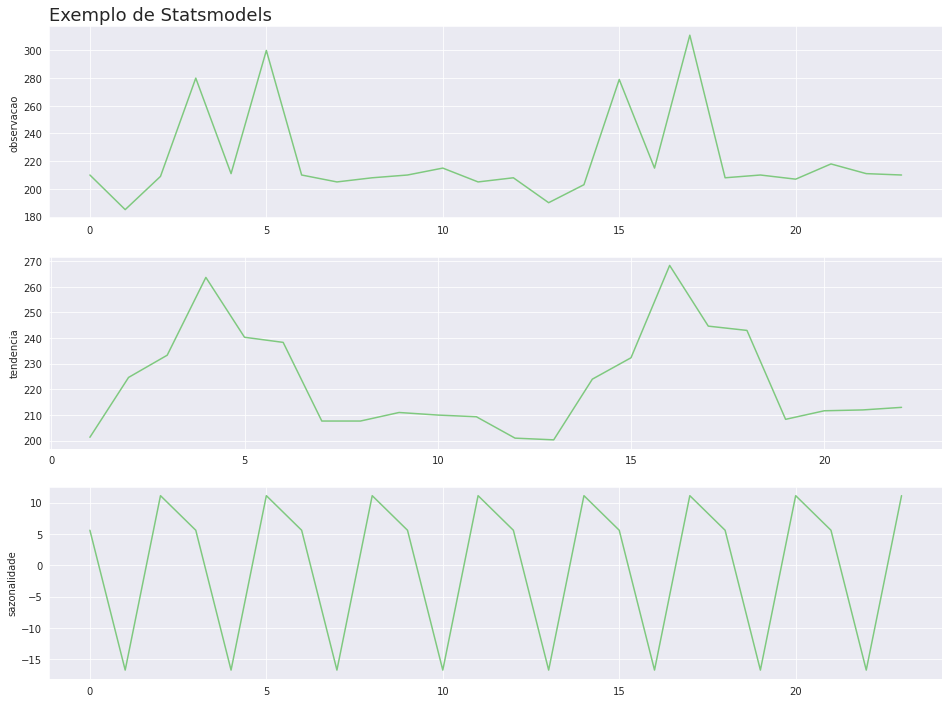

In [ ]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado,
                'Exemplo de Statsmodels')

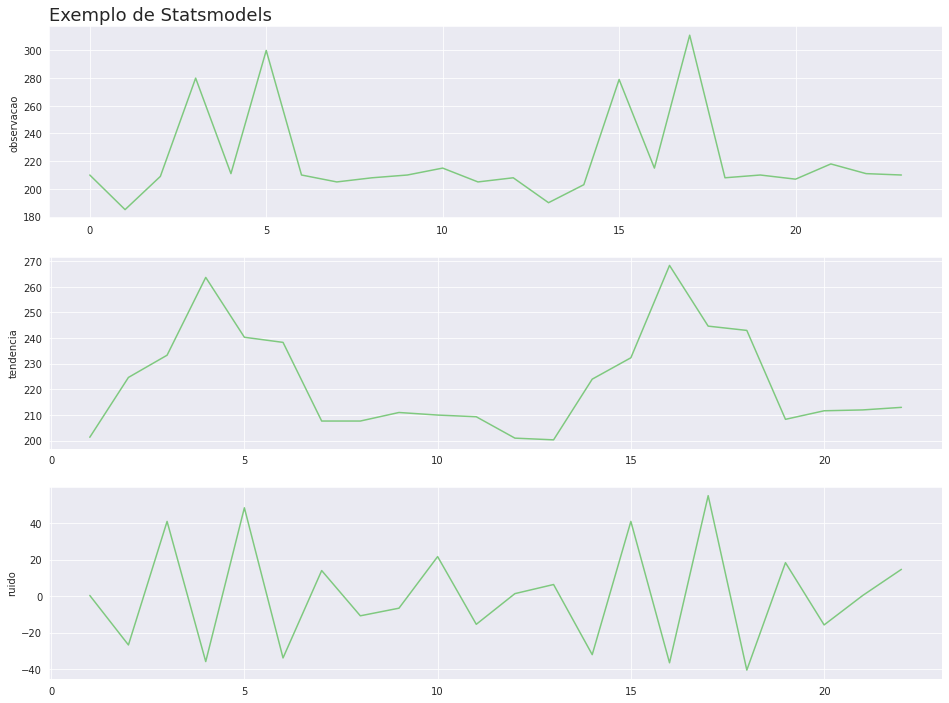

In [ ]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'ruido', resultado,
                'Exemplo de Statsmodels')

**Encontrei dados nulos... e agora?**

Se tentarmos plotar um gráfico que possui dados nulos, uma mensagem de erro será exibida informando que não temos tipos numéricos para agregar.

Pensando nisso, dentre as inúmeras possíveis soluções de contornar esse problema, <a href="https://colab.research.google.com/drive/1UZFN5Jke6gFgYLNMbsU7eBJ9Pk9TdpIm">criei este caderno com 5 possíveis soluções para contornar a falta dos dados.</a>

Dentre as soluções listadas no notebook acima, temos:

- Preenchendo os dados nulos com o valor médio da coluna
- Preenchendo os dados nulos com um valor específico
- Deletando os dados nulos do DataFrame
- Preenchendo um dado nulo com o valor anterior ou posterior
- Interpolando dados nulos com a média

<a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html">Neste link, você pode acessar a documentação do pandas e encontrar outras soluções para dados nulos ou perdidos.</a>

<font size= 12>**Nessa aula:**</font>

- Aplicamos a função de Autocorrelação nas vendas, no aumento e na aceleração das vendas diárias e vimos que havia uma correlação entre elas

- Executamos uma técnica de normalização de time series para minimizar as frequências pela quantidade de dias de finais de semana de cada mês

- Analisamos uma time series importando da biblioteca statsmodels.tsa.seasonal a função seasonal_decompose, que nos mostra o que é a nossa observação, tendência, sazonalidade e ruído de uma só vez

# Alucel - Análise de Vendas

In [ ]:
alucel = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science: Introdução a análise de Séries Temporais/material curso - Time Series/alucel.csv')

In [ ]:
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [ ]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [ ]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [ ]:
print('Quantidade de linhas e colunas: ', alucel.shape)
print('Quantidade de dados nulos: ', alucel.isna().sum().sum())

Quantidade de linhas e colunas:  (61, 2)
Quantidade de dados nulos:  0


In [ ]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


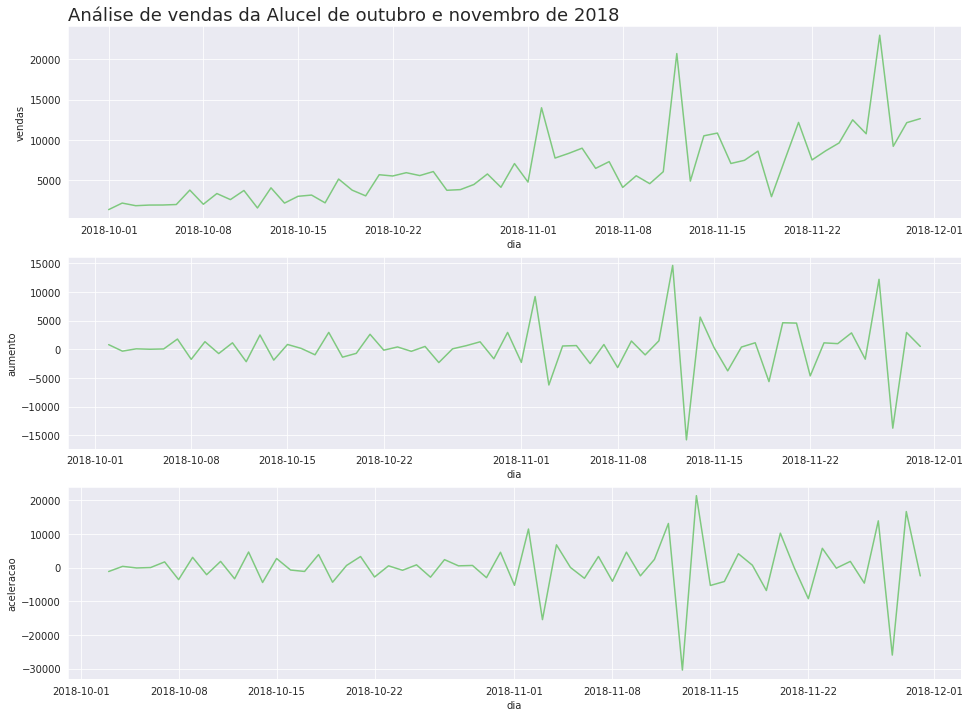

In [ ]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao',
                alucel, 'Análise de vendas da Alucel de outubro e novembro de 2018')

## Média móvel

In [ ]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [ ]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


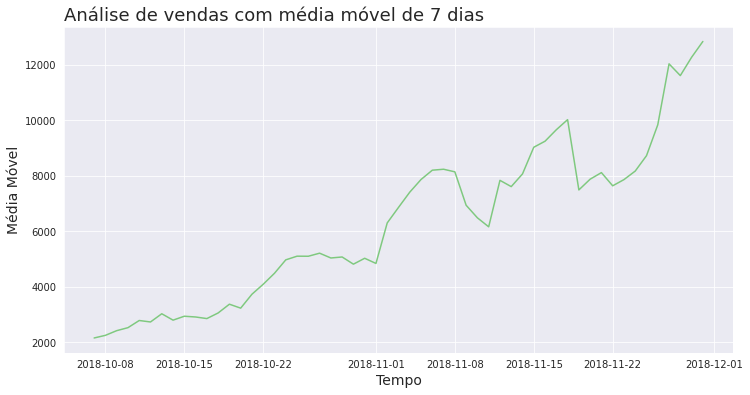

In [ ]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

In [ ]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

In [ ]:
alucel.head(21)

,dia,vendas,aumento,aceleracao,media_movel,media_movel_21
0,2018-10-01,1374.83,NaN,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429,NaN
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143,NaN
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857,NaN
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571,NaN


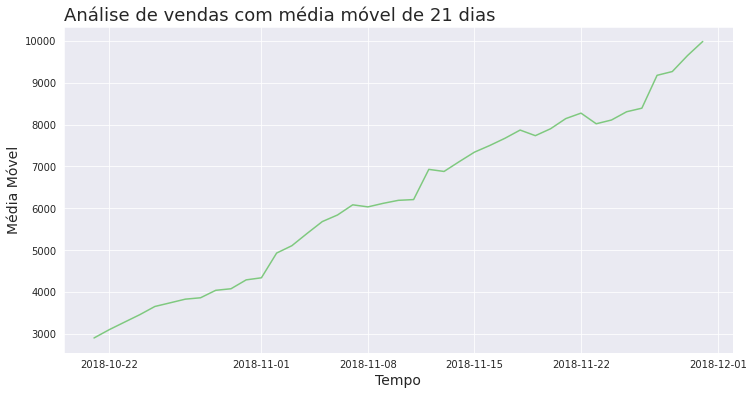

In [ ]:
plotar('Análise de vendas com média móvel de 21 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel_21', alucel)

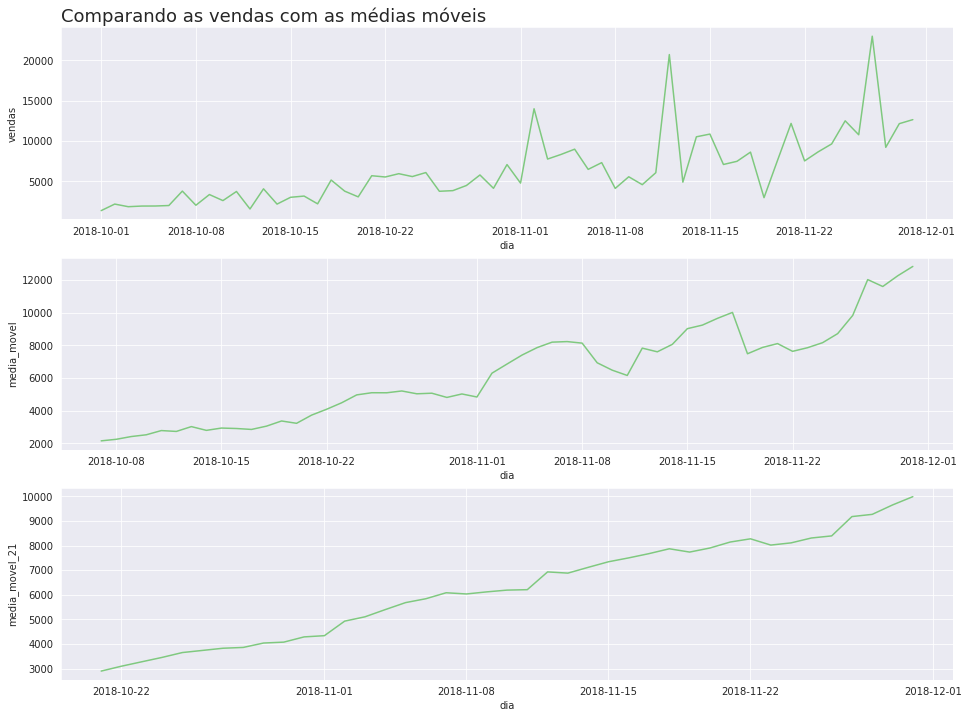

In [ ]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21',
                alucel, 'Comparando as vendas com as médias móveis')

<font size= 12>**Nessa aula:**</font>

Aprendemos que um componente presente na maioria das Time Series é o ruído

Vimos que podemos minimizar os ruídos de uma time series aplicando a técnica da média móvel

Criamos um gráfico com a média móvel de 7 e 21 dias e comparamos com nossa observação, conforme ilustra a imagem abaixo